In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-08 15:56:59.447319


<h1>Dummy-muuttujien yhteenveto</h1>

Dummy-muuttujaksi (binäärinen muuttuja, dikotominen muuttuja) kutsutaan muuttujaa, joka saa arvokseen 1 tai 0 (joskus tämän sijasta käytetään tyhjää). 

    
Esimerkiksi kyselytutkimuksessa monivalintakysymys, jonka vaihtoehdoista vastaaja saa valita useammankin kuin yhden, koodataan dummy-muuttujiksi: Jokainen kysymyksen vaihtoehto on muuttuja, joka saa arvokseen 1, jos vastaaja on sen valinnut. Muussa tapauksessa arvo on 0 tai tyhjä.
    

Tärkeää! Usein valintakysymyksiä (saa valita vain yhden vaihtoehdon) kutsutaan virheellisesti monivalintakysymyksiksi. Valintakysmystä ei kannata koodata dummy-muuttujiksi paitsi koneoppimisen malleja käytettäessä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Avaan datan
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# Yhteenvetoon otettavien dummy-muuttujien nimet
monivalinta = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

In [5]:
# Valintojen lukumäärät count-funktiolla lukumäärän mukaan järjestettynä
df1 = df[monivalinta].sum().to_frame('Lukumäärä').sort_values(by = 'Lukumäärä', ascending = False)

# shape[0] antaa datan rivien lukumäärän eli vastaajien lukumäärän
n = df.shape[0]

# Prosentit
df1['% vastaajista'] = df1['Lukumäärä'] / n * 100

df1.index = ['Työterveyshuolto', 'Lomaosake', 'Kuntosali', 'Hieroja']

# Ulkoasun viimeistely
df1.style.format({'Lukumäärä':'{:.0f}', '% vastaajista':'{:.1f} %'})

,Lukumäärä,% vastaajista
Työterveyshuolto,47,57.3 %
Lomaosake,22,26.8 %
Kuntosali,20,24.4 %
Hieroja,9,11.0 %


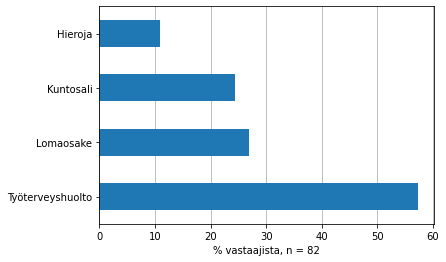

In [6]:
# Vaakapylväskaavio
df1['% vastaajista'].plot.barh(zorder = 2)

# x-akselin otsikko
plt.xlabel('% vastaajista, n = ' + str(n))

# Pystysuuntainen taustaviivoitus
plt.grid(axis = 'x')

<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/

In [7]:
# Tämän notebookin suoritukseen käyttämäni pandas-versio oheiskirjastoineen
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 73c68257545b5f8530b7044f56647bd2db92e2ba
python           : 3.9.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : Finnish_Finland.1252

pandas           : 1.3.3
numpy            : 1.20.3
pytz             : 2021.1
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : 3.0.1
lxml.etree       : 4.6.3
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.0.1
IPython          : 7.27.0
pandas_datareader: 0.10.0
bs4              : None
bottleneck       : 1.3.2
fsspec   